In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
def read_image(im_name):
    image = cv2.imread(im_name)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    return image_rgb



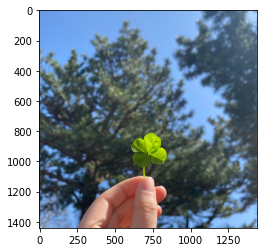

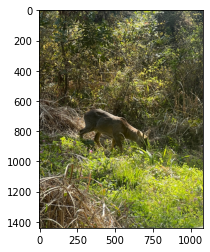

In [3]:
## To make function and read image 2
im1=read_image('./data/1.PIL-image001.jpeg')
im2=read_image('./data/2.Opencv-image002.jpeg')


In [4]:
print(im1.shape, im2.shape)     ## height, width, channel

(1440, 1440, 3) (1440, 1080, 3)


## image cropping

In [6]:
print(f"im1.shape = {im1.shape[:2]}")
print(f"im2.shape = {im2.shape[:2]}")
h1, w1 = im1.shape[:2]
h2, w2 = im2.shape[:2]
size = 720

print(f"first == {h1/2-size/2}, second == {h1/2+size/2},third == {w1/2-size/2}, fourth == {w1/2+size/2}")
# def center_crop(im,h,w,size=720):
#     im = im[int(h/2-size/2):int(h/2+size/2), int(w/2-size/2):int(w/2+size/2)]

im1.shape = (1440, 1440)
im2.shape = (1440, 1080)
first == 360.0, second == 1080.0,third == 360.0, fourth == 1080.0


In [5]:
print(im1.shape[:2])

(1440, 1440)


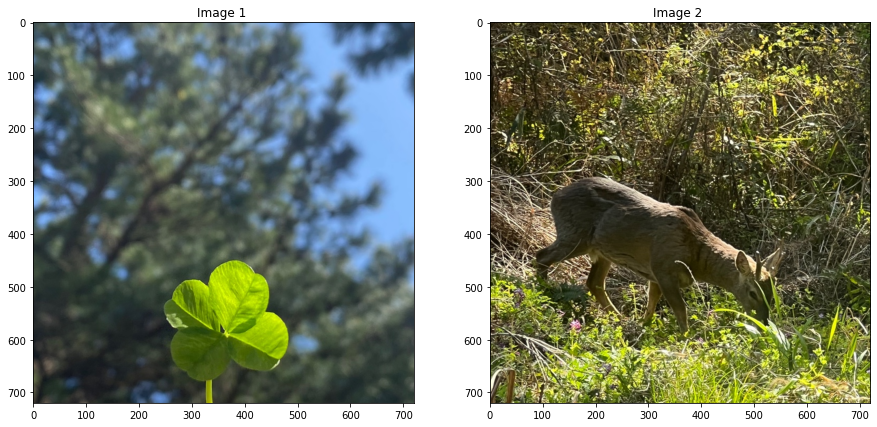

In [12]:
# Just do indexing!

h1, w1 = im1.shape[:2]
h2, w2 = im2.shape[:2]
size = 720

def center_crop(im,h,w,size=720):
    im = im[int(h/2-size/2):int(h/2+size/2), int(w/2-size/2):int(w/2+size/2)]
    return im

im1 = center_crop(im1, h1, w1, size)    ## [360:1080,360:1080]
im2 = center_crop(im2, h2, w2, size)


def two_image_show(im1, im2):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title('Image 1 ')
    plt.imshow(im1)
    plt.subplot(1,2,2)
    plt.title('Image 2 ')    
    plt.imshow(im2)
    plt.show()


two_image_show(im1, im2)

## image masking

using bit-wise operations

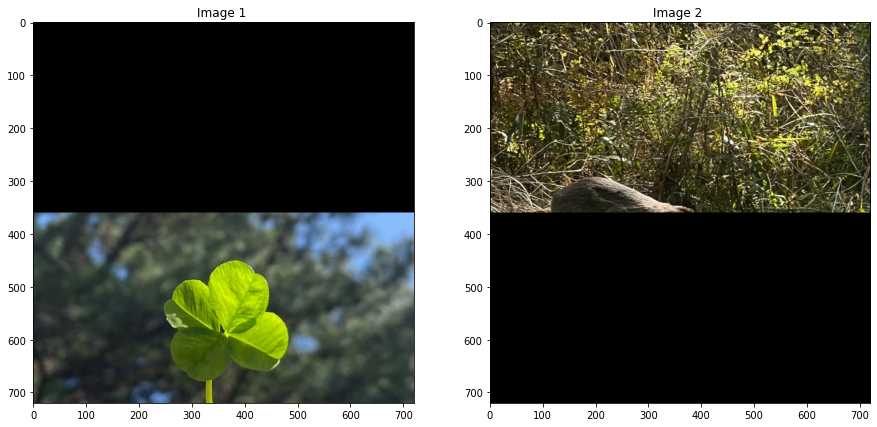

In [16]:
## 검은색 판을 두고 거기에 합칠 이미지를 올린다.


import numpy as np

im1_mask = np.zeros_like(im1)       ## zero array만들기
im1_mask[int(size/2):,] = im1[int(size/2):,]    ## zero array에 밑에부분 붙이기
                                                ## 콤마는 특정 차원(행 또는 열)에서 모든 요소를 선택하도록 도와주는 역할.
im2_mask = np.zeros_like(im2)
im2_mask[:int(size/2), ] = im2[:int(size/2), ]

two_image_show(im1_mask, im2_mask)



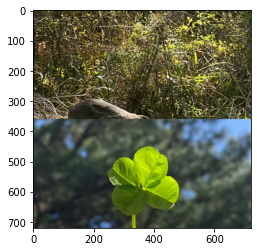

In [14]:
merge = cv2.bitwise_or(im1_mask, im2_mask)      ## 두이미지 더하기,
                                                ## bitwise_or : or연산
plt.imshow(merge)
plt.show()

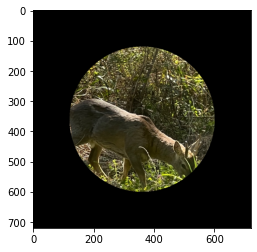

In [27]:
## circle mask
circle_mask = np.zeros_like(im2)
cv2.circle(circle_mask, (size//2,size//2), size//3, (255,255,255), -1 )
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

masked_im2 = cv2.bitwise_and(im2, circle_mask)
#masked_im2 = cv2.bitwise_or( circle_mask,im2)

# plt.imshow(circle_mask)
plt.imshow(masked_im2)

In [18]:
plt.imsave('save_img.png', masked_im2)